In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train_titanic.csv')

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis
- Let's begin some exploratory data analysis! We'll start by checking out missing data!

- Missing Data
- We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

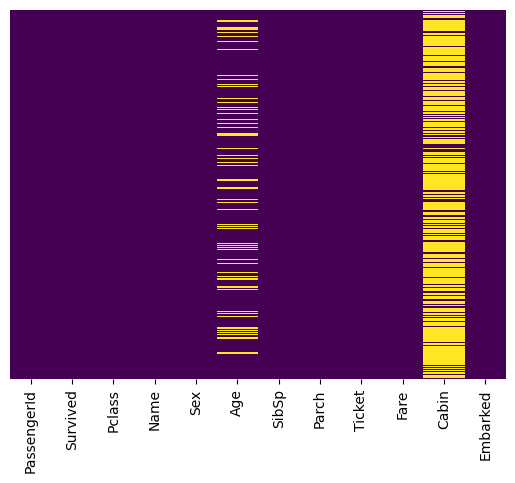

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

- Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

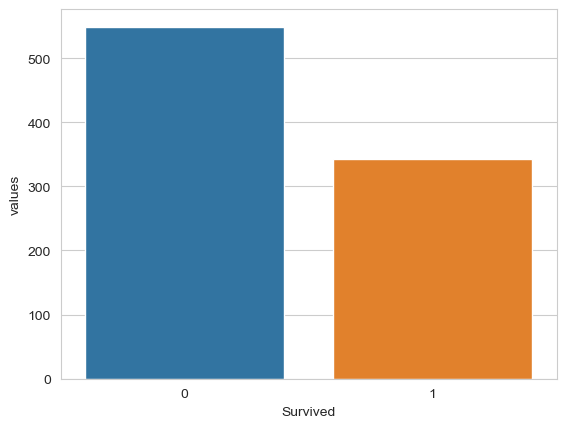

In [86]:
# Checking for data imbalance

temp = train['Survived'].value_counts()    # Counts the number of ones and zeroes in the column
temp_df = pd.DataFrame({'Survived' : temp.index, 'values' : temp.values})    # Creating a data frame with value and their counts
sns.barplot(x = 'Survived', y = 'values', data = temp_df)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

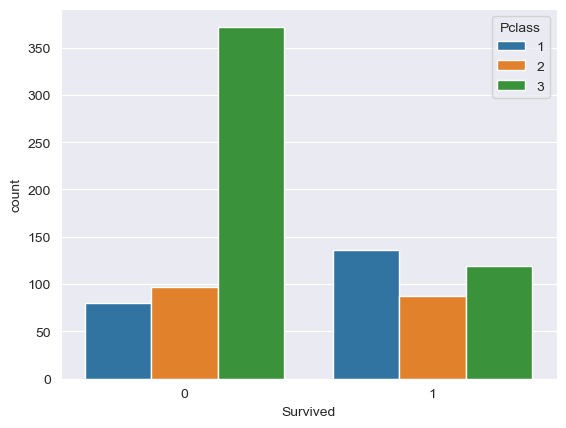

In [91]:
sns.set_style("darkgrid")
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:>

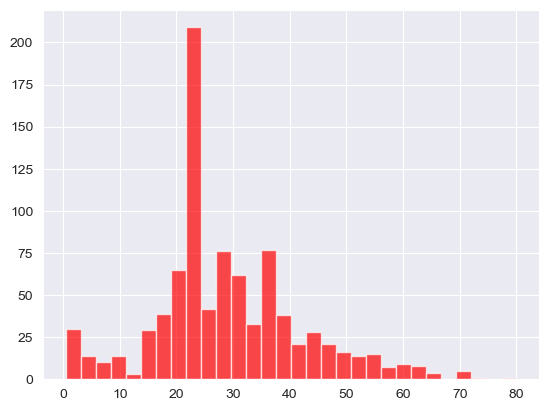

In [92]:
train['Age'].hist(bins=30,color='red',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

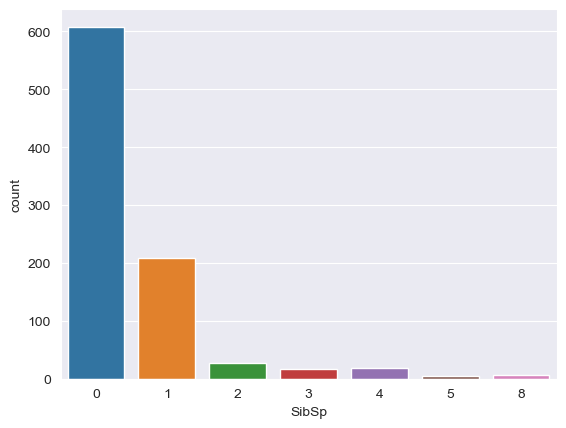

In [93]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

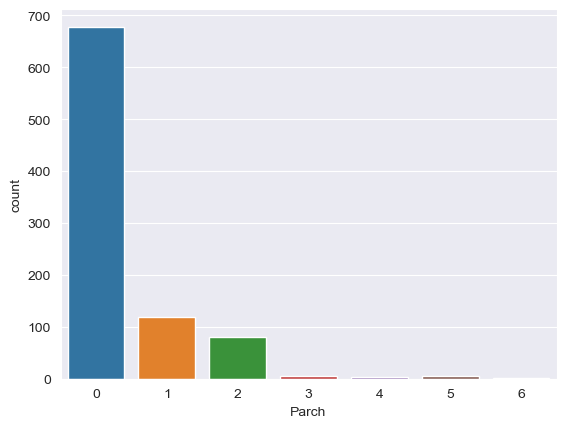

In [94]:
sns.countplot(x='Parch',data=train)

<AxesSubplot:>

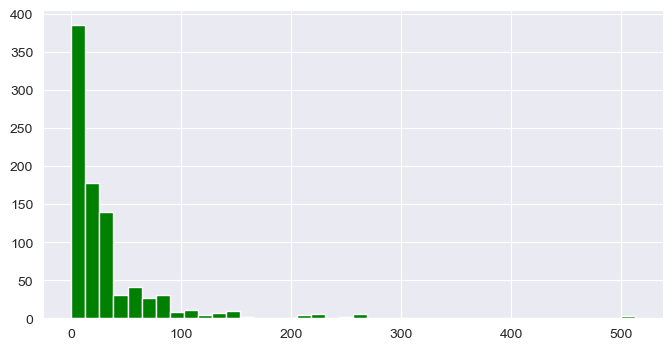

In [95]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning
- We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

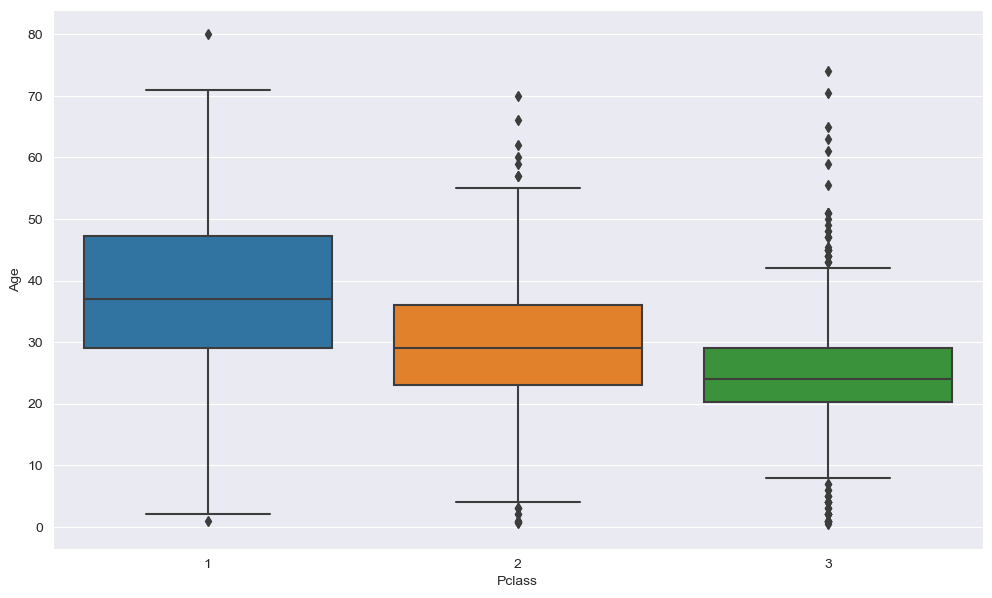

In [96]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [20]:
train['Embarked'] = train['Embarked'].fillna('S')
 #Now let's check that heat map again!

<AxesSubplot:>

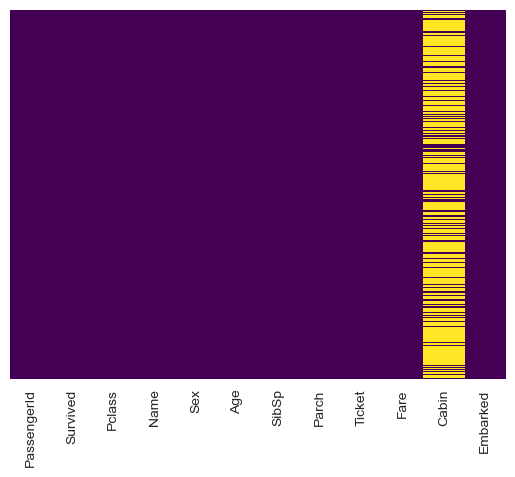

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.
#We will sum of family member

In [22]:
train.drop('Cabin',axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train.dropna(inplace=True)

# Converting Categorical Features
- We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
train = pd.concat([train,sex,embark],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model
- Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=101)

# Training and Predicting

In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [38]:
predictions = logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,1,0,1
700,701,1,18.0,1,0,227.525,0,0,0
748,749,1,19.0,1,0,53.100,1,0,1
751,752,3,6.0,0,1,12.475,1,0,1
481,482,2,29.0,0,0,0.000,1,0,1


In [39]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1], dtype=int64)

# Evaluation

- We can check precision,recall,f1-score using classification report!

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(confusion_matrix(y_test,predictions))

[[45  6]
 [12 27]]


In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



# Decision Tree Classifiction

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
dt_pred = dt_model.predict(X_test)

In [46]:
print(confusion_matrix(y_test,dt_pred))

[[42  9]
 [15 24]]


In [47]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        51
           1       0.73      0.62      0.67        39

    accuracy                           0.73        90
   macro avg       0.73      0.72      0.72        90
weighted avg       0.73      0.73      0.73        90



# Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [50]:
rf_pre=rf.predict(X_test)

In [51]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [15 24]]


In [52]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        51
           1       0.89      0.62      0.73        39

    accuracy                           0.80        90
   macro avg       0.83      0.78      0.78        90
weighted avg       0.82      0.80      0.79        90



# ANN

In [55]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [57]:
ann  = Sequential()
ann.add(Dense(units= 32, activation = 'relu', input_dim=9))
ann.add(Dense(units= 32, activation = 'relu'))
ann.add(Dense(units= 1, activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [60]:
ann.fit(X_train,y_train, batch_size=32, epochs=300,verbose= 0)

In [61]:
ann_pred = ann.predict(X_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 [==============================] - 0s 5ms/step
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]


In [62]:
print(confusion_matrix(y_test,ann_pred))

[[47  4]
 [29 10]]


In [63]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74        51
           1       0.71      0.26      0.38        39

    accuracy                           0.63        90
   macro avg       0.67      0.59      0.56        90
weighted avg       0.66      0.63      0.58        90



### Now we will use test dataset

In [65]:
test = pd.read_csv('test_titanic.csv')

<AxesSubplot:>

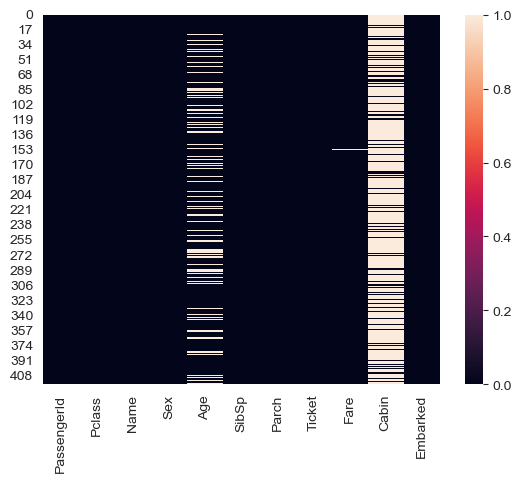

In [66]:
sns.heatmap(test.isnull())

In [67]:
test.drop('Cabin',axis=1,inplace=True)

In [68]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [70]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [71]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [72]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [73]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [74]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [75]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [77]:
ann.fit(train.drop(['Survived'],axis=1),train['Survived'] , epochs=300,verbose= 0)

In [78]:
test_prediction = ann.predict(test)
test_prediction = [ 1 if y>=0.5 else 0 for y in test_prediction]

14/14 [==============================] - 0s 3ms/step


In [79]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [80]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [81]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,0


In [82]:
df= new_test[['PassengerId' ,'Survived']]

In [83]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [84]:
df.to_csv('predictions.csv' , index=False)